# Applied Machine Learning:  Week 2 (Supervised Learning, Part I)¶

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

fruits = pd.read_table('Data/fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


## Datasets

<IPython.core.display.Javascript object>


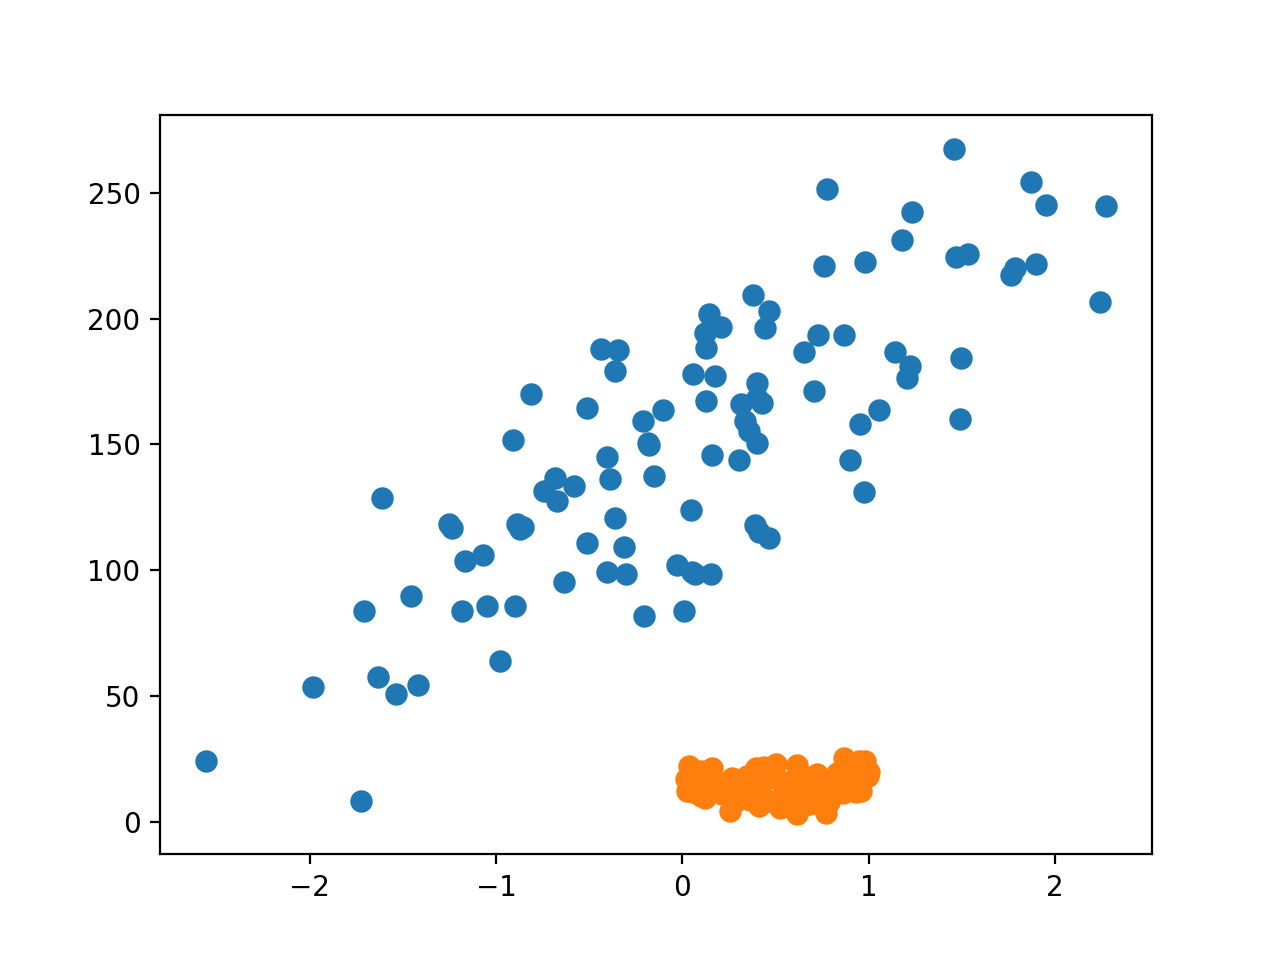

<IPython.core.display.Javascript object>


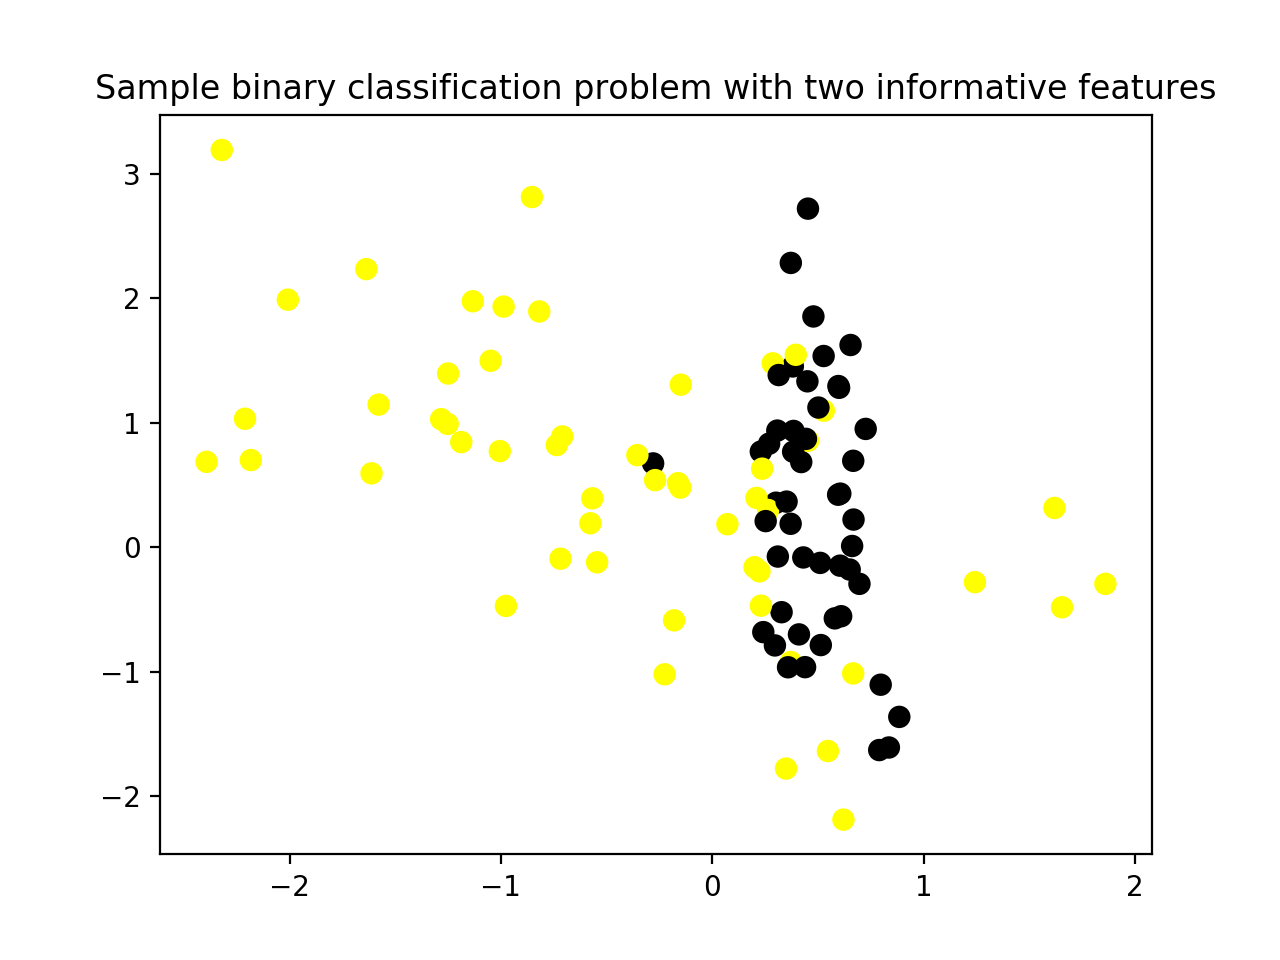

<IPython.core.display.Javascript object>


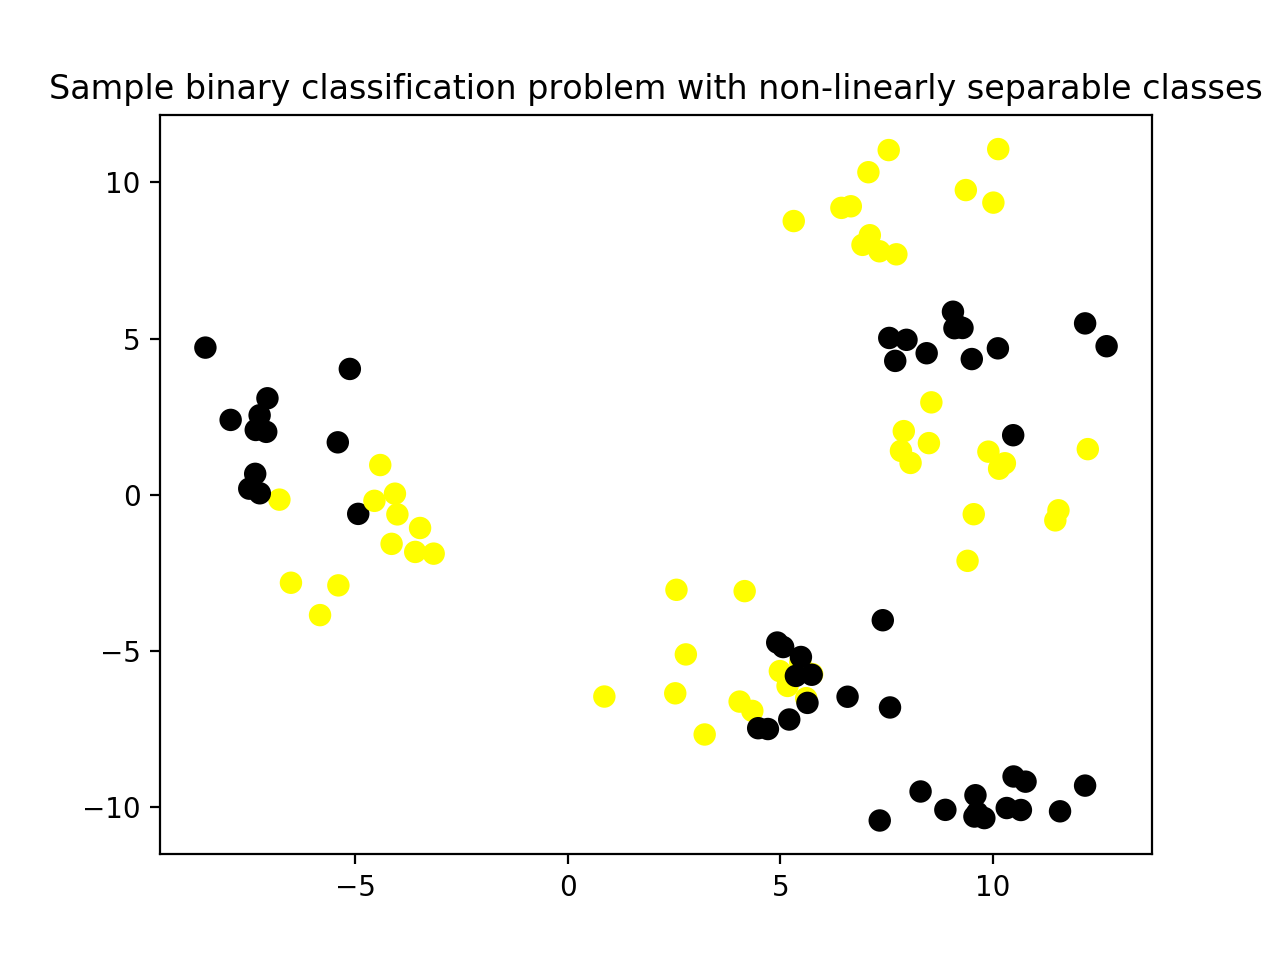

In [2]:
from sklearn.datasets import make_blobs, make_classification
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150.0, noise=30, random_state=0)
plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples=100, n_features=7, random_state=0)
plt.scatter(X_F1[:, 2], y_F1, marker='o', s=50)
plt.show()

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()


## Classification

<IPython.core.display.Javascript object>


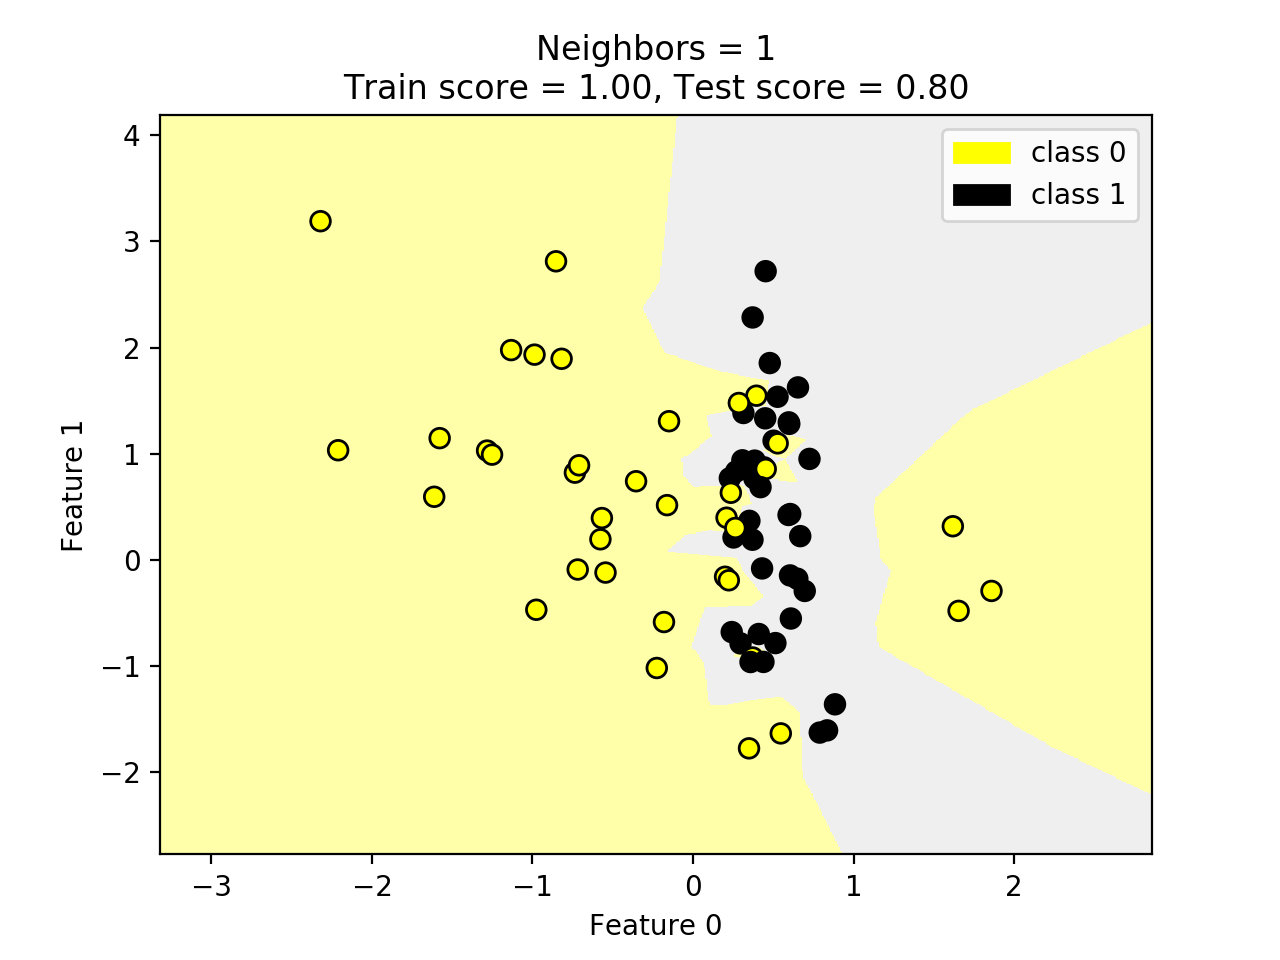

<IPython.core.display.Javascript object>


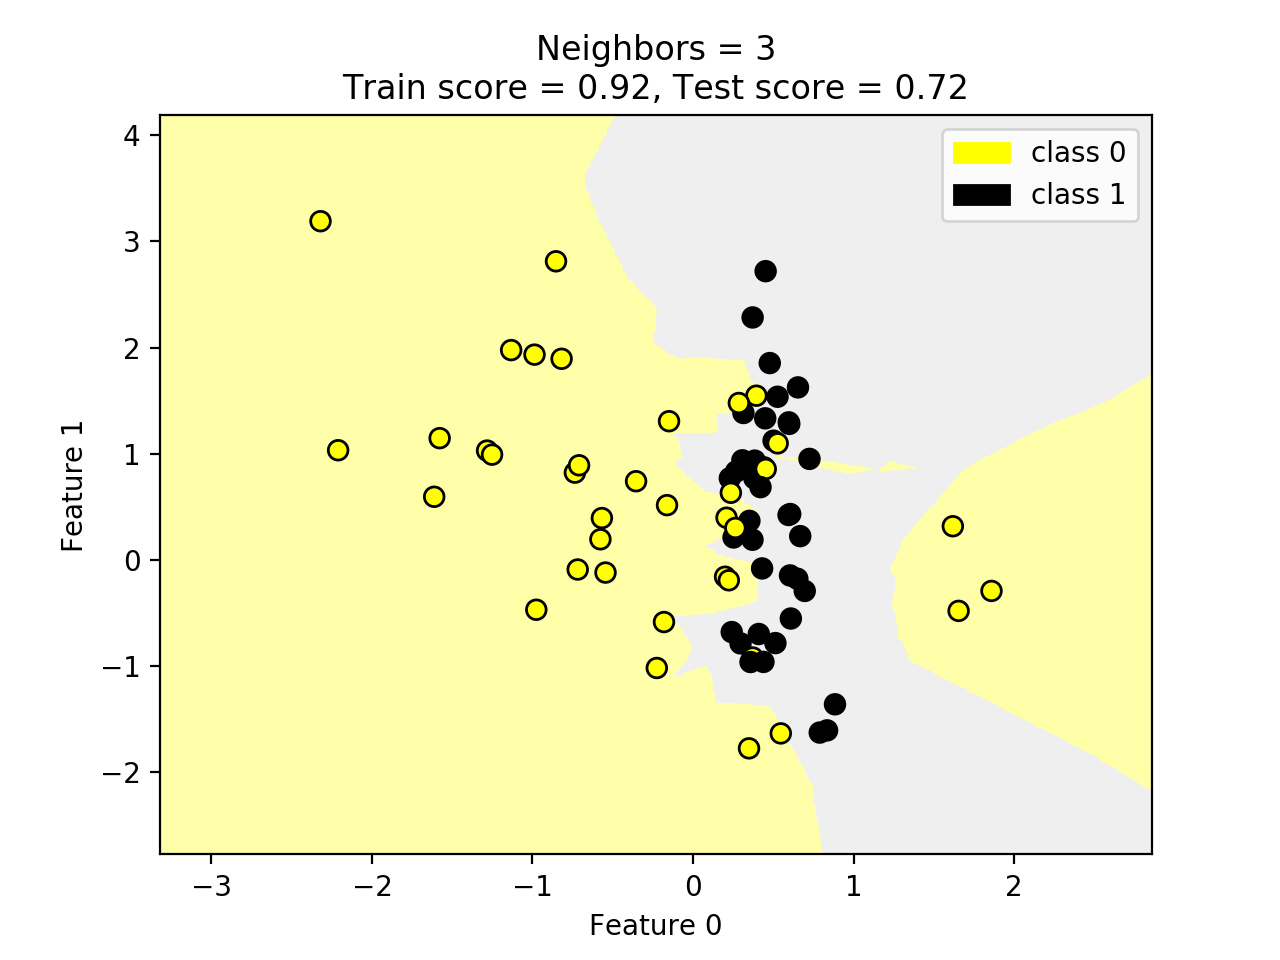

<IPython.core.display.Javascript object>


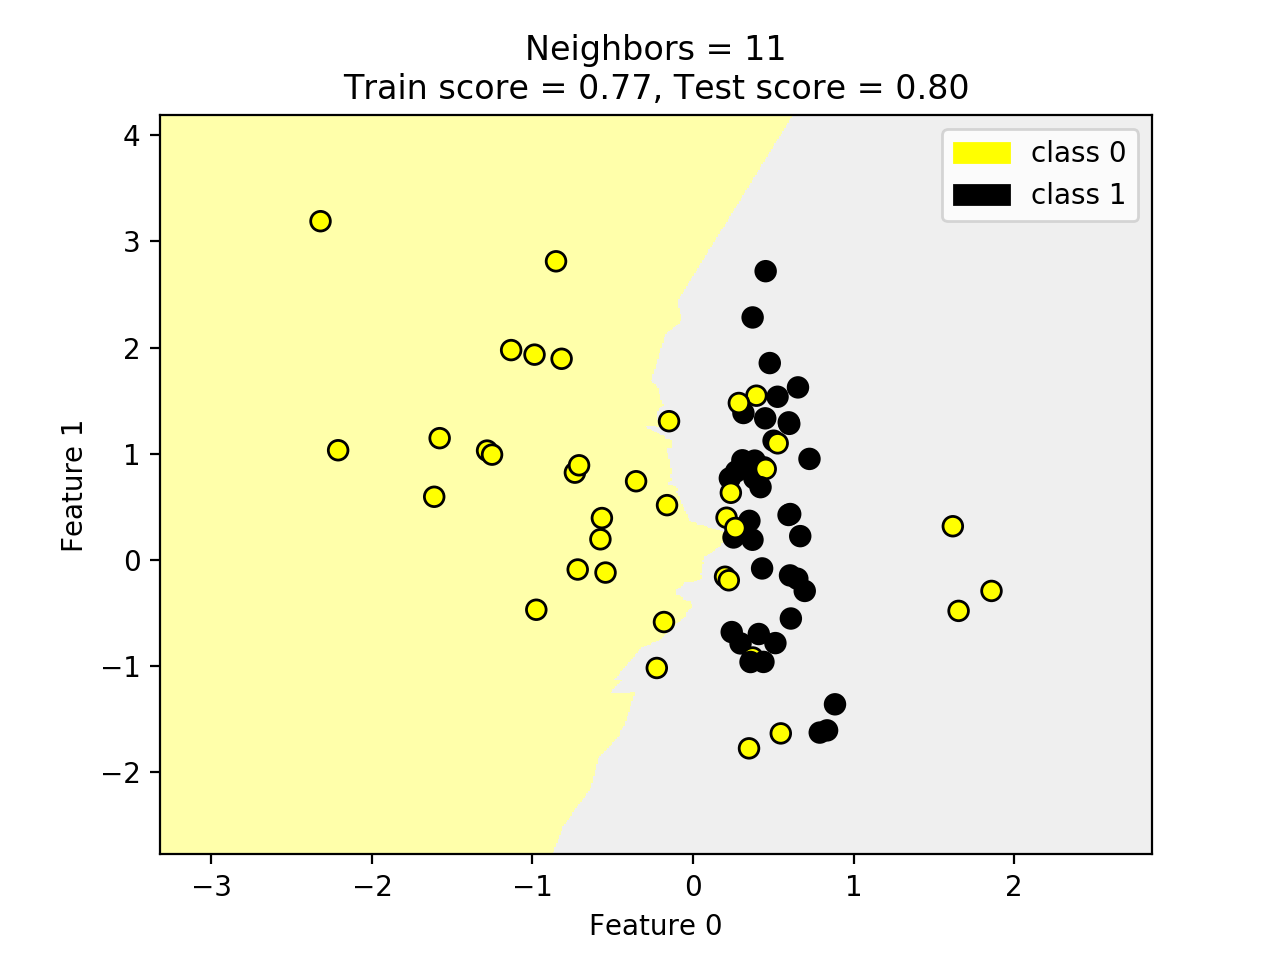

In [3]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

## Regression

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 231.71  148.36  150.59  150.59   72.15  166.51  141.91  235.57  208.26
  102.1   191.32  134.5   228.32  148.36  159.17  113.47  144.04  199.23
  143.19  166.51  231.71  208.26  128.02  123.14  141.91]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


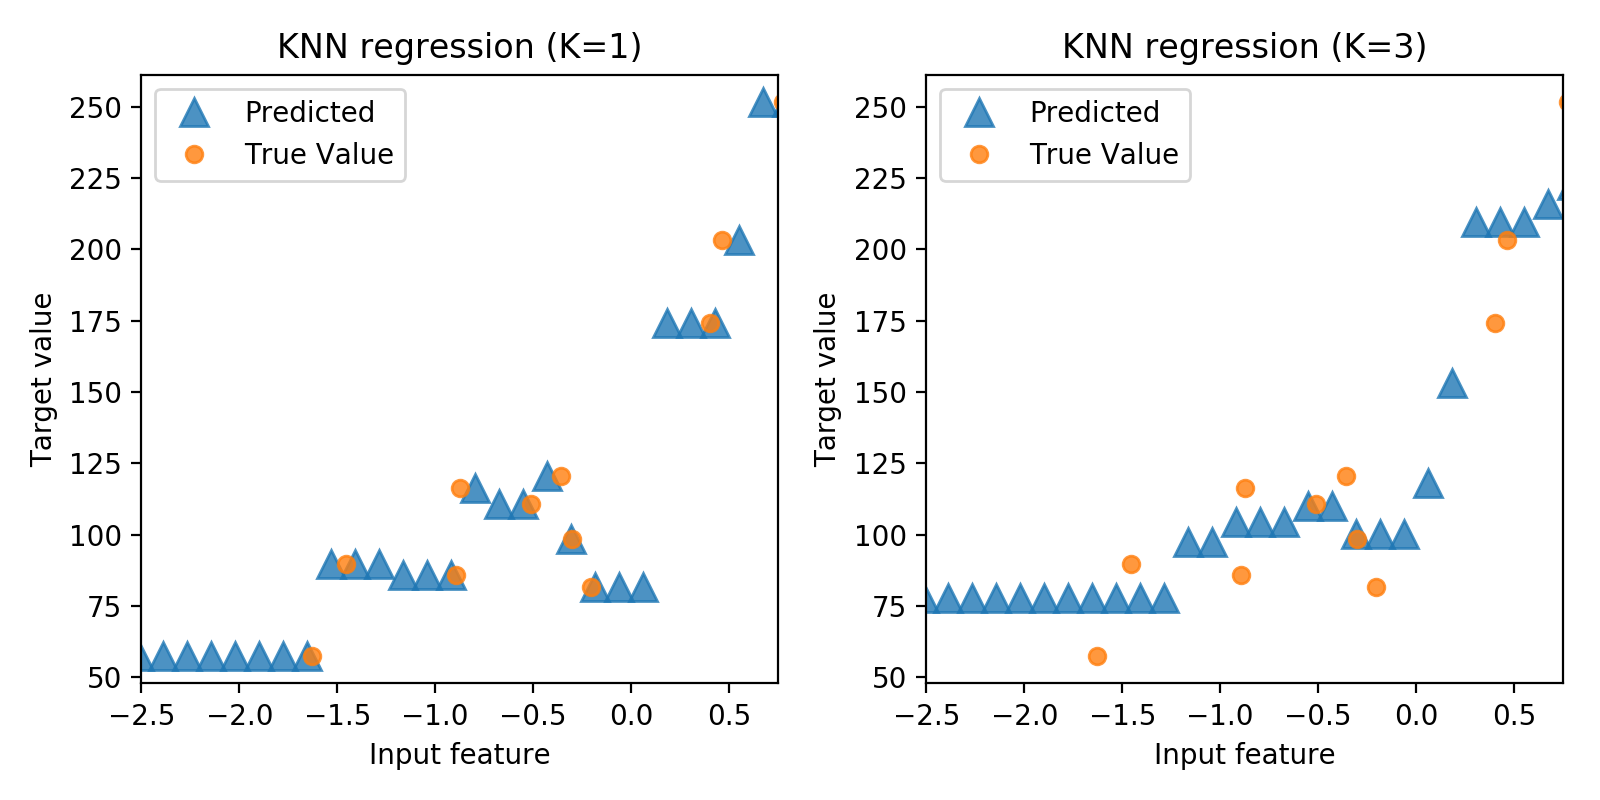

In [5]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

## Regression model complexity as parameter of K

<IPython.core.display.Javascript object>


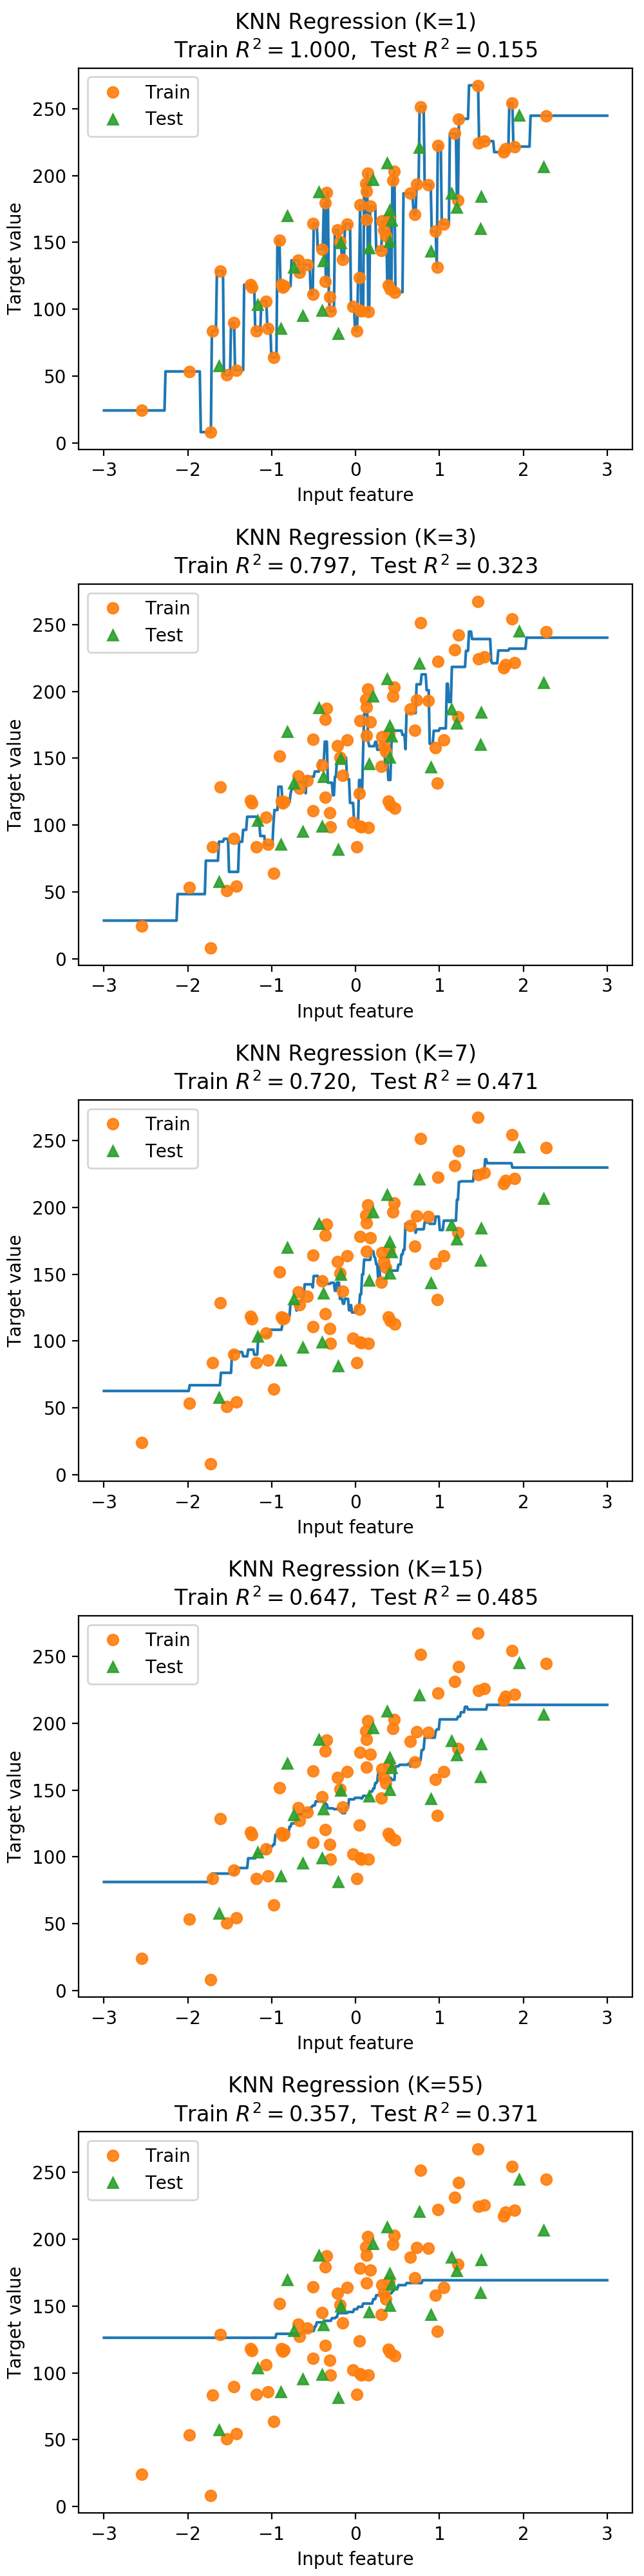

In [6]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)

print("Linear regression coefficeient: ", lin_reg.coef_)
print("Linear regression bias/inercept: ", lin_reg.intercept_)
print("R-Squared score training: ", lin_reg.score(X_train, y_train))
print("R-Squared score test:", lin_reg.score(X_test, y_test))

Linear regression coefficeient:  [ 45.71]
Linear regression bias/inercept:  148.445753457
R-Squared score training:  0.678595077114
R-Squared score test: 0.491596159349


/Users/viveks/Repos/Learning/applied-data-science-with-python/venv/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Linear regression example plot

<IPython.core.display.Javascript object>


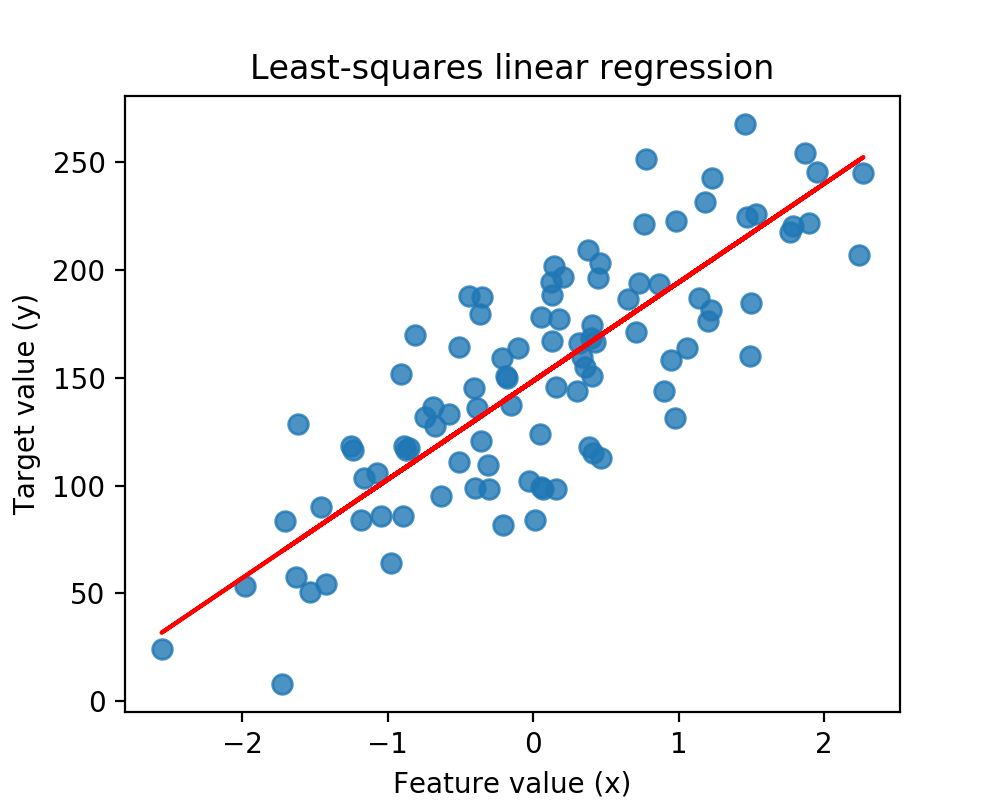

In [8]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, lin_reg.coef_ * X_R1 + lin_reg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print("Crime Dataset")
print("Linear regression intercept: ", linreg.intercept_)
print("Linear regression coefficient: ", linreg.coef_)
print("R-Square Error (training): ", linreg.score(X_train, y_train))
print("R-Squared Error (test): ", linreg.score(X_test, y_test))

Crime Dataset
Linear regression intercept:  -1728.13067249
Linear regression coefficient:  [  1.62e-03  -9.43e+01   1.36e+01  -3.13e+01  -8.15e-02  -1.69e+01
  -2.43e-03   1.53e+00  -1.39e-02  -7.72e+00   2.28e+01  -5.66e+00
   9.35e+00   2.07e-01  -7.43e+00   9.66e-03   4.38e-03   4.80e-03
  -4.46e+00  -1.61e+01   8.83e+00  -5.07e-01  -1.42e+00   8.18e+00
  -3.87e+00  -3.54e+00   4.49e+00   9.31e+00   1.74e+02   1.18e+01
   1.51e+02  -3.30e+02  -1.35e+02   6.95e-01  -2.38e+01   2.77e+00
   3.82e-01   4.39e+00  -1.06e+01  -4.92e-03   4.14e+01  -1.16e-03
   1.19e+00   1.75e+00  -3.68e+00   1.60e+00  -8.42e+00  -3.80e+01
   4.74e+01  -2.51e+01  -2.88e-01  -3.66e+01   1.90e+01  -4.53e+01
   6.83e+02   1.04e+02  -3.29e+02  -3.14e+01   2.74e+01   5.12e+00
   6.92e+01   1.98e-02  -6.12e-01   2.65e+01   1.01e+01  -1.59e+00
   2.24e+00   7.38e+00  -3.14e+01  -9.78e-05   5.02e-05  -3.48e-04
  -2.50e-04  -5.27e-01  -5.17e-01  -4.10e-01   1.16e-01   1.46e+00
  -3.04e-01   2.44e+00  -3.66e+01   1.

## Ridge Regression

In [10]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

ridgereg= Ridge(alpha=20.0).fit(X_train, y_train)
print("Ridge Rgression")
print("Ridge regression intercept : ", ridgereg.intercept_)
print("Ridge regression coeff : ", ridgereg.coef_)
print("R-Squared Error (Training): ", ridgereg.score(X_train, y_train))
print("R-Squared Error (Test) : ", linreg.score(X_test, y_test))
print('Number of non-zero features: {}'
     .format(np.sum(ridgereg.coef_ != 0)))

Ridge Rgression
Ridge regression intercept :  -3352.42303585
Ridge regression coeff :  [  1.95e-03   2.19e+01   9.56e+00  -3.59e+01   6.36e+00  -1.97e+01
  -2.81e-03   1.66e+00  -6.61e-03  -6.95e+00   1.72e+01  -5.63e+00
   8.84e+00   6.79e-01  -7.34e+00   6.70e-03   9.79e-04   5.01e-03
  -4.90e+00  -1.79e+01   9.18e+00  -1.24e+00   1.22e+00   1.03e+01
  -3.78e+00  -3.73e+00   4.75e+00   8.43e+00   3.09e+01   1.19e+01
  -2.05e+00  -3.82e+01   1.85e+01   1.53e+00  -2.20e+01   2.46e+00
   3.29e-01   4.02e+00  -1.13e+01  -4.70e-03   4.27e+01  -1.23e-03
   1.41e+00   9.35e-01  -3.00e+00   1.12e+00  -1.82e+01  -1.55e+01
   2.42e+01  -1.32e+01  -4.20e-01  -3.60e+01   1.30e+01  -2.81e+01
   4.39e+01   3.87e+01  -6.46e+01  -1.64e+01   2.90e+01   4.15e+00
   5.34e+01   1.99e-02  -5.47e-01   1.24e+01   1.04e+01  -1.57e+00
   3.16e+00   8.78e+00  -2.95e+01  -2.33e-04   3.14e-04  -4.14e-04
  -1.80e-04  -5.74e-01  -5.18e-01  -4.21e-01   1.53e-01   1.33e+00
   3.85e+00   3.03e+00  -3.78e+01   1.38e-

### Ridge regression with feature normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
print("Ridge Rgression")
print("Ridge regression intercept : ", linridge.intercept_)
print("Ridge regression coeff : ", linridge.coef_)
print("R-Squared Error (Training): ", linridge.score(X_train_scaled, y_train))
print("R-Squared Error (Test) : ", linridge.score(X_test_scaled, y_test))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Ridge Rgression
Ridge regression intercept :  933.390638504
Ridge regression coeff :  [  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-Squared Error (Training):  0.614617595562
R-Squared Error (Test) :  0.598606602
Number of non-zero features: 88


## Ridge regreesion normalization with parameter alpha

In [12]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.49

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



## Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985795
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with 

## Lasso Regression with regularization parameter : alpha

In [14]:
for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train_scaled, y_train)
    r1_test = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    print(alpha, np.sum(linlasso.coef_ !=0), r1_test, r2_test)

0.5 35 0.650265800515 0.580725429053
1 25 0.641094599064 0.604675068225
2 20 0.630701366871 0.623772585702
3 17 0.617507562975 0.627154554533
5 12 0.600905647724 0.614039042569
10 6 0.567107170455 0.578182074681
20 2 0.509484945798 0.503590480586
50 1 0.313243823093 0.302107098509


## Polynomial Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)
print("Linear regression")
print("Linear regression coeff : ", linreg.coef_)
print("Linear regression intercept : ", linreg.intercept_)
print("Linear regression score (training) : ", linreg.score(X_train, y_train))
print("Linear regression score (test) : ", linreg.score(X_test, y_test))

poly = PolynomialFeatures(degree=2)
print(X_F1.shape)
X_F1_poly = poly.fit_transform(X_F1)
print(X_F1_poly.shape)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)
print("Linear regression (Polynomial degree 2)")
print("Linear regression (Polynomial degree 2) coeff : ", linreg.coef_)
print("Linear regression (Polynomial degree 2) intercept : ", linreg.intercept_)
print("Linear regression (Polynomial degree 2) score (training) : ", linreg.score(X_train, y_train))
print("Linear regression (Polynomial degree 2) score (test) : ", linreg.score(X_test, y_test))


linridge = Ridge().fit(X_train, y_train)
print("Linear regression (Polynomial degree 2)")
print("Linear regression (Polynomial degree 2) coeff : ", linridge.coef_)
print("Linear regression (Polynomial degree 2) intercept : ", linridge.intercept_)
print("Linear regression (Polynomial degree 2) score (training) : ", linridge.score(X_train, y_train))
print("Linear regression (Polynomial degree 2) score (test) : ", linridge.score(X_test, y_test))

Linear regression
Linear regression coeff :  [  4.42   6.     0.53  10.24   6.55  -2.02  -0.32]
Linear regression intercept :  1.54250919754
Linear regression score (training) :  0.722375020737
Linear regression score (test) :  0.722133957693
(100, 7)
(100, 36)
Linear regression (Polynomial degree 2)
Linear regression (Polynomial degree 2) coeff :  [  0.    16.65  26.73 -22.13  12.44   6.93   1.05   3.71 -13.38  -5.73
   1.62   3.66   5.05  -1.46   1.95 -15.13   4.87  -2.97  -7.78   5.15
  -4.65  18.41  -2.22   2.17  -1.28   1.88   0.15   0.56  -0.89  -2.18
   1.38  -4.9   -2.24   1.38  -0.55  -1.09]
Linear regression (Polynomial degree 2) intercept :  -3.20567439893
Linear regression (Polynomial degree 2) score (training) :  0.968599683017
Linear regression (Polynomial degree 2) score (test) :  0.804643755051
Linear regression (Polynomial degree 2)
Linear regression (Polynomial degree 2) coeff :  [ 0.    2.23  4.73 -3.15  3.86  1.61 -0.77 -0.15 -1.75  1.6   1.37  2.52
  2.72  0.49 -1.

## Logistic Regression 

<IPython.core.display.Javascript object>


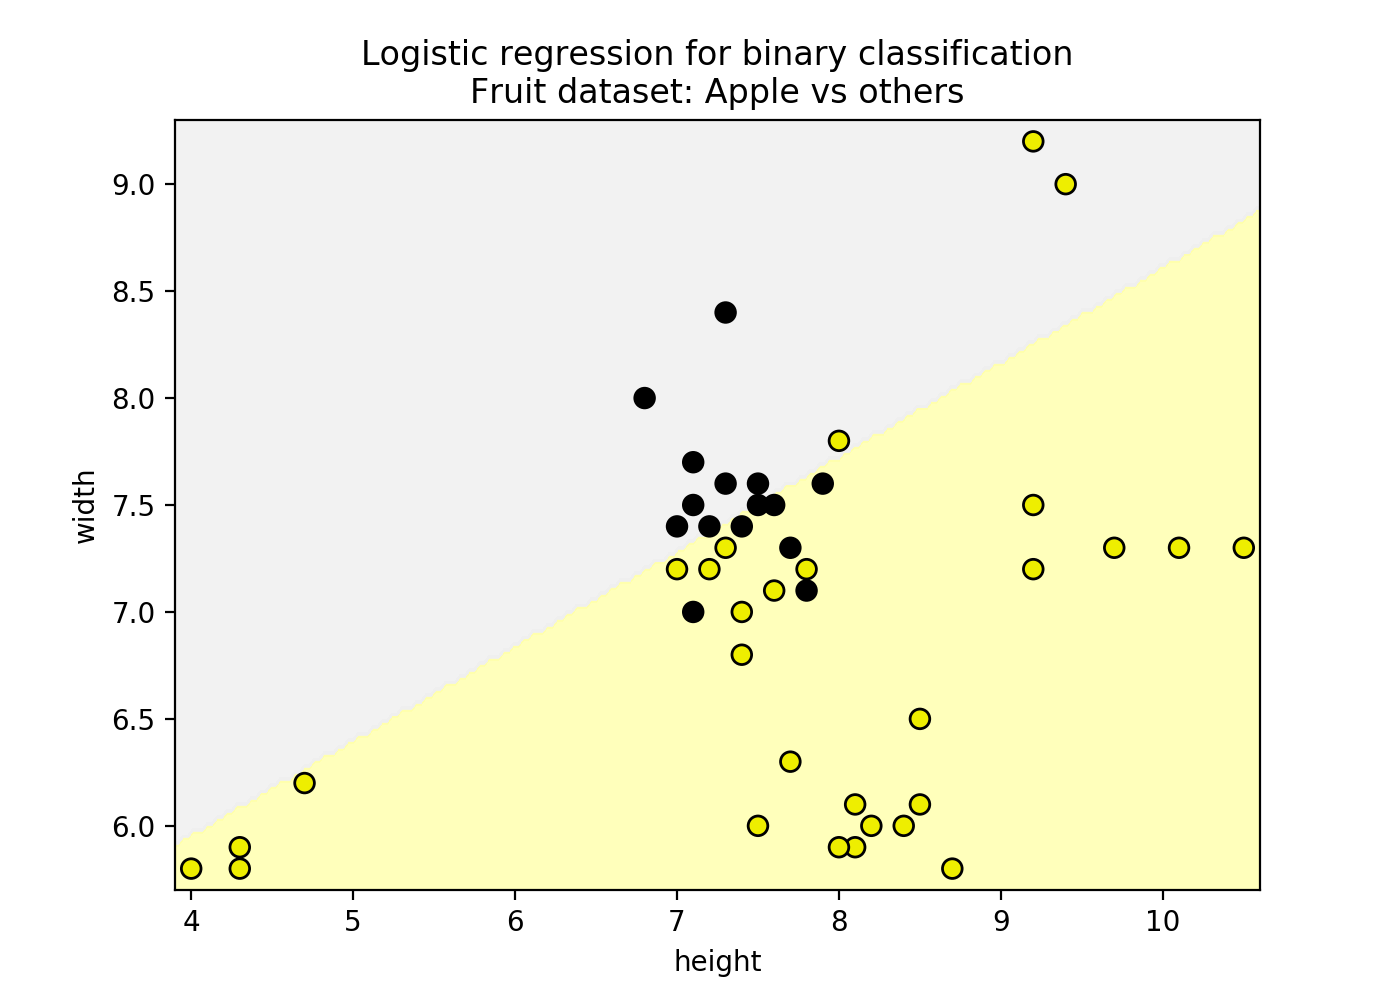

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


In [16]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

## Logistic regression on simple synthetic dataset

<IPython.core.display.Javascript object>


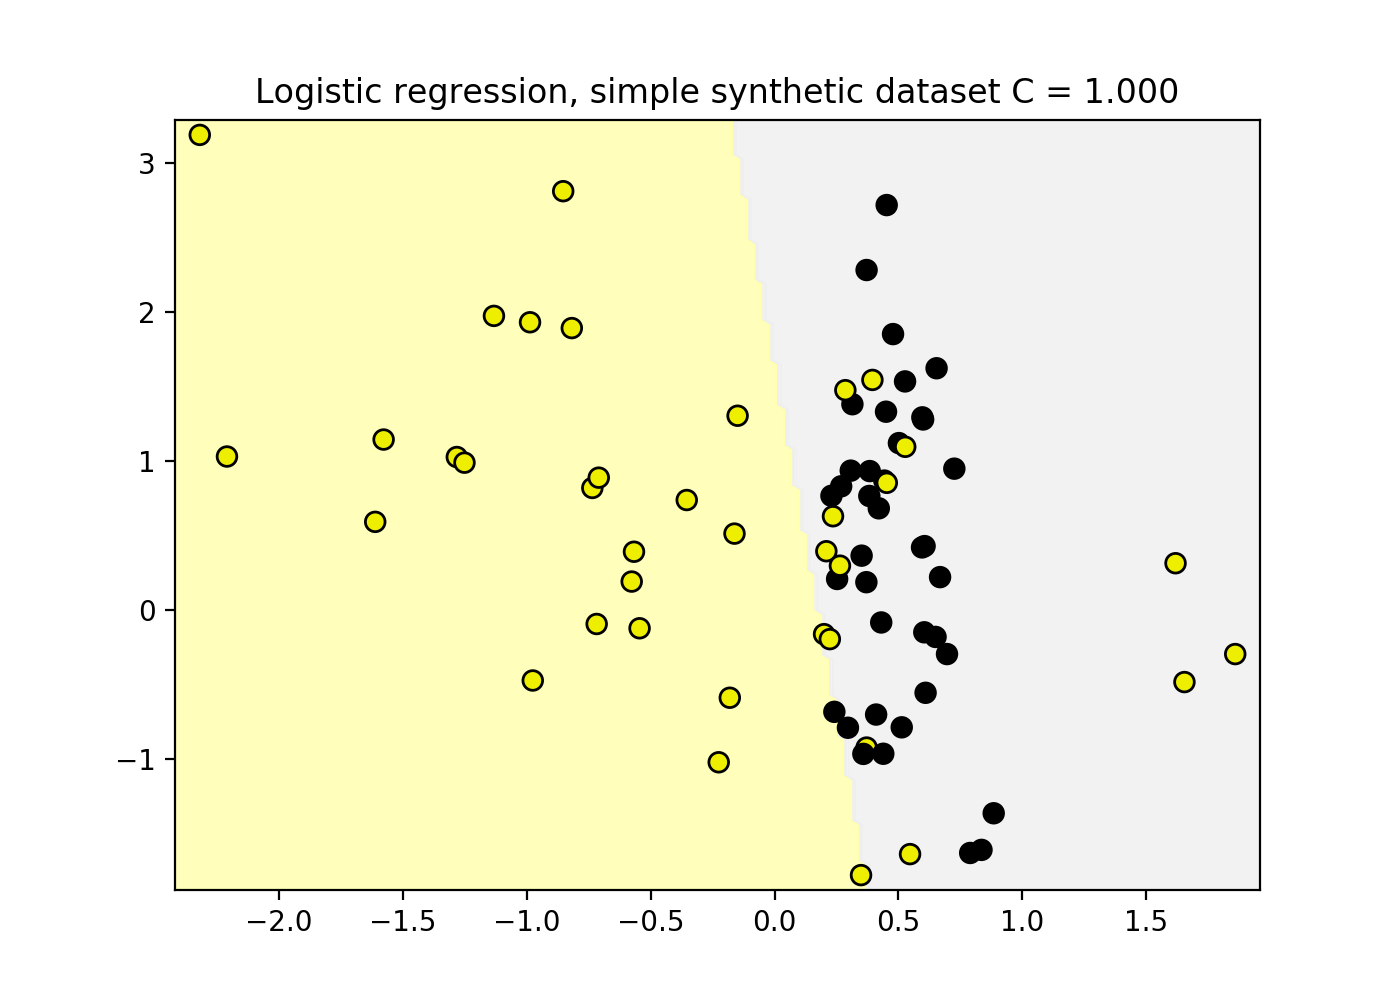

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.80


In [17]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)

plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     


## Logistic regularization : C Parameter

<IPython.core.display.Javascript object>


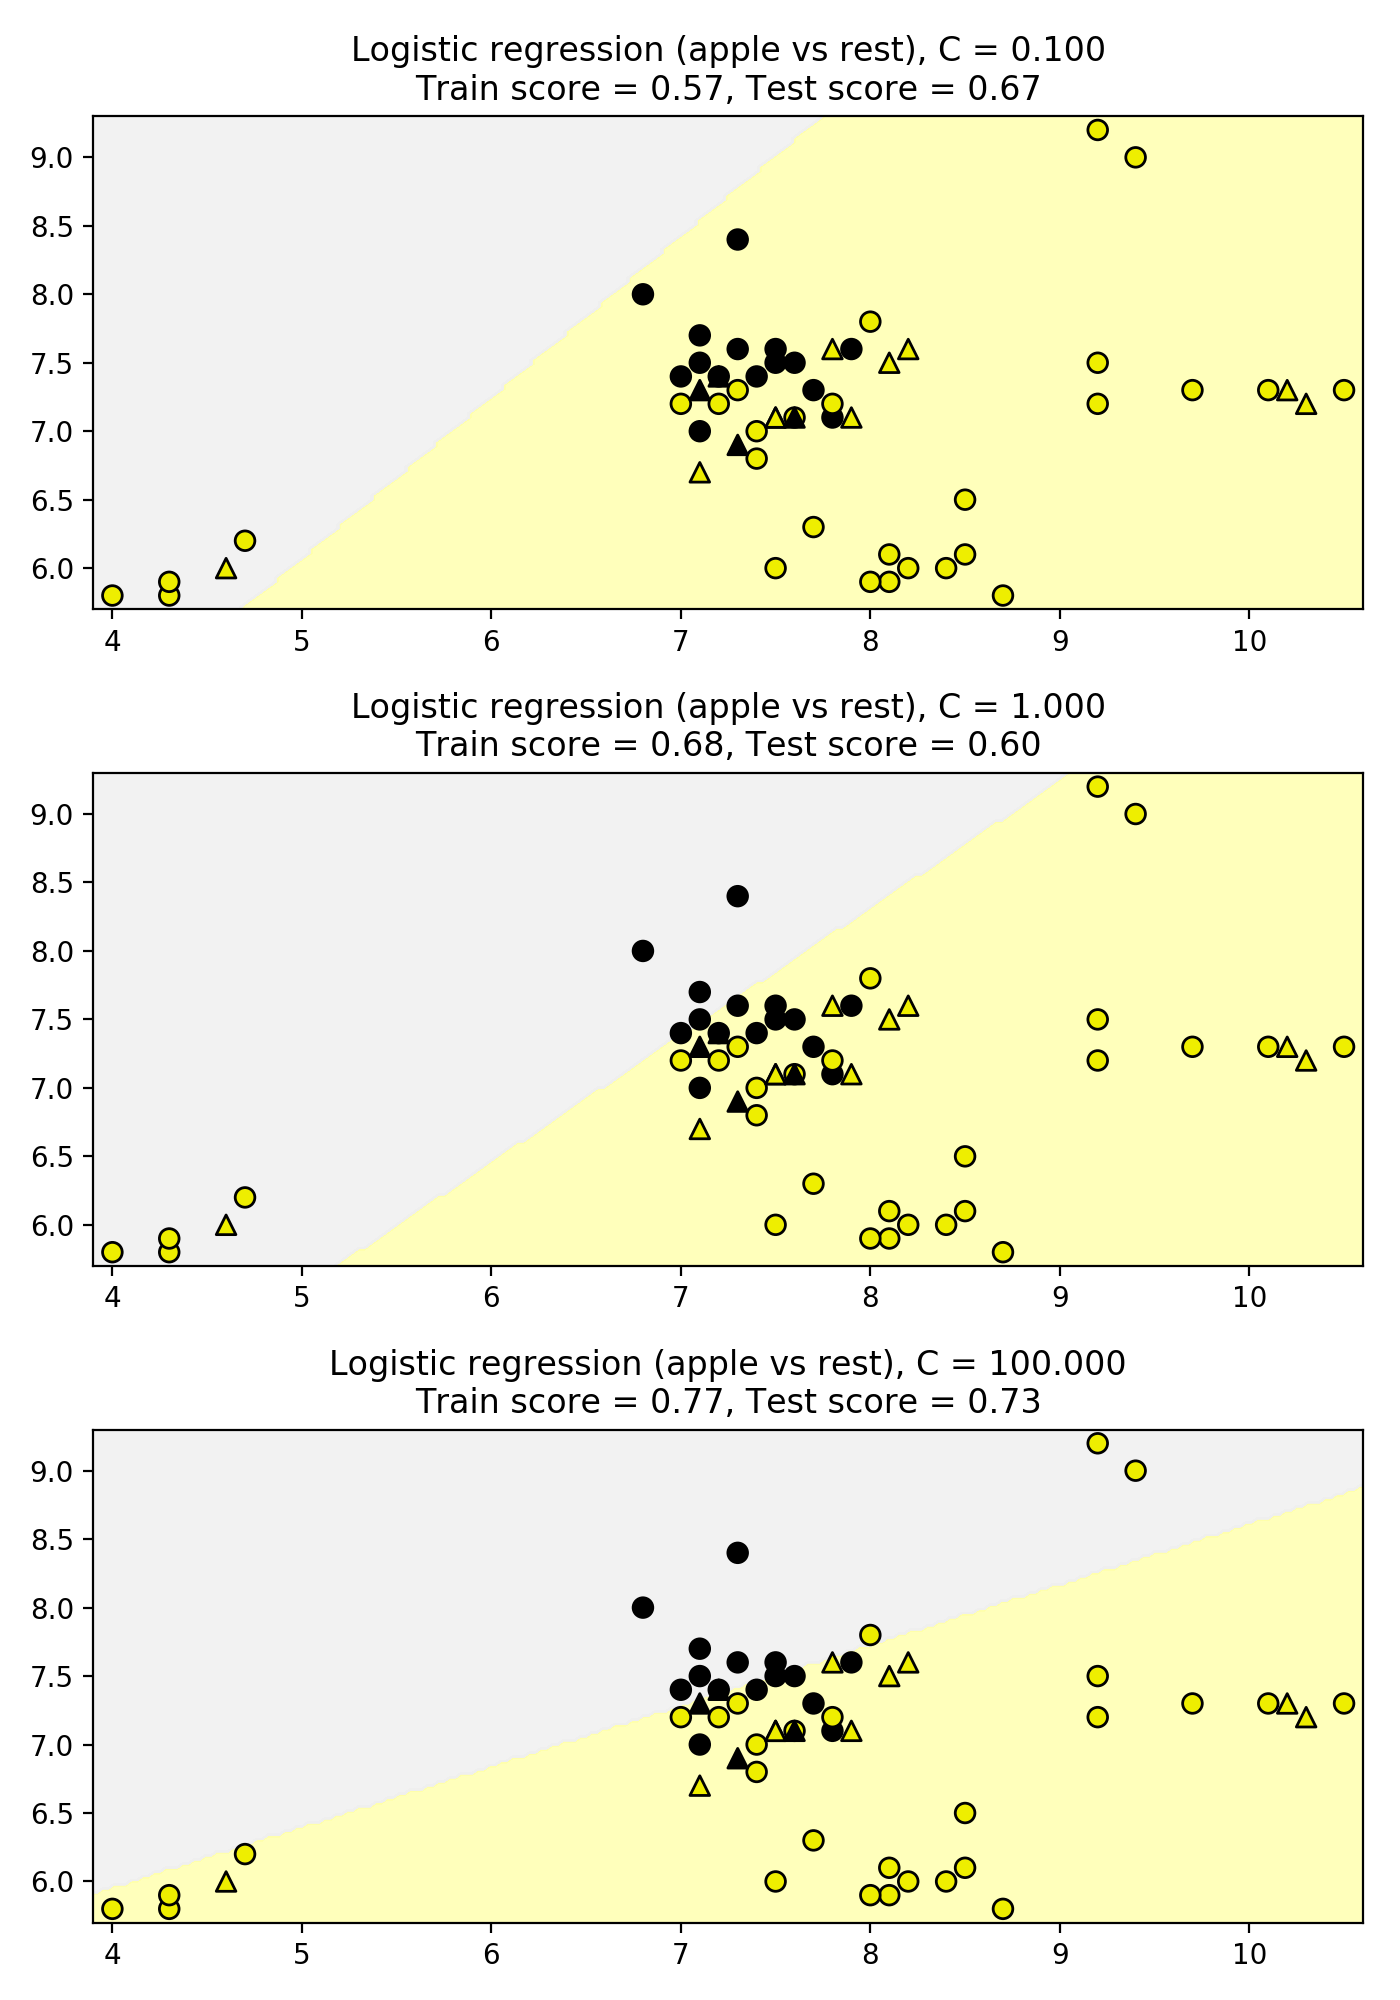

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.as_matrix(), 
                                                   y_fruits_apple.as_matrix(), random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(7, 10))

for c, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=c).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(c)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
    
plt.tight_layout()

## Application to real dataset

In [19]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = LogisticRegression().fit(X_train, y_train)
print("Cancer Dataset")
print("Logistic regression score (training) : ", clf.score(X_train, y_train))
print("Logistic regression score (training) : ", clf.score(X_test, y_test))


Cancer Dataset
Logistic regression score (training) :  0.960093896714
Logistic regression score (training) :  0.958041958042


## Support vector machine 

<IPython.core.display.Javascript object>


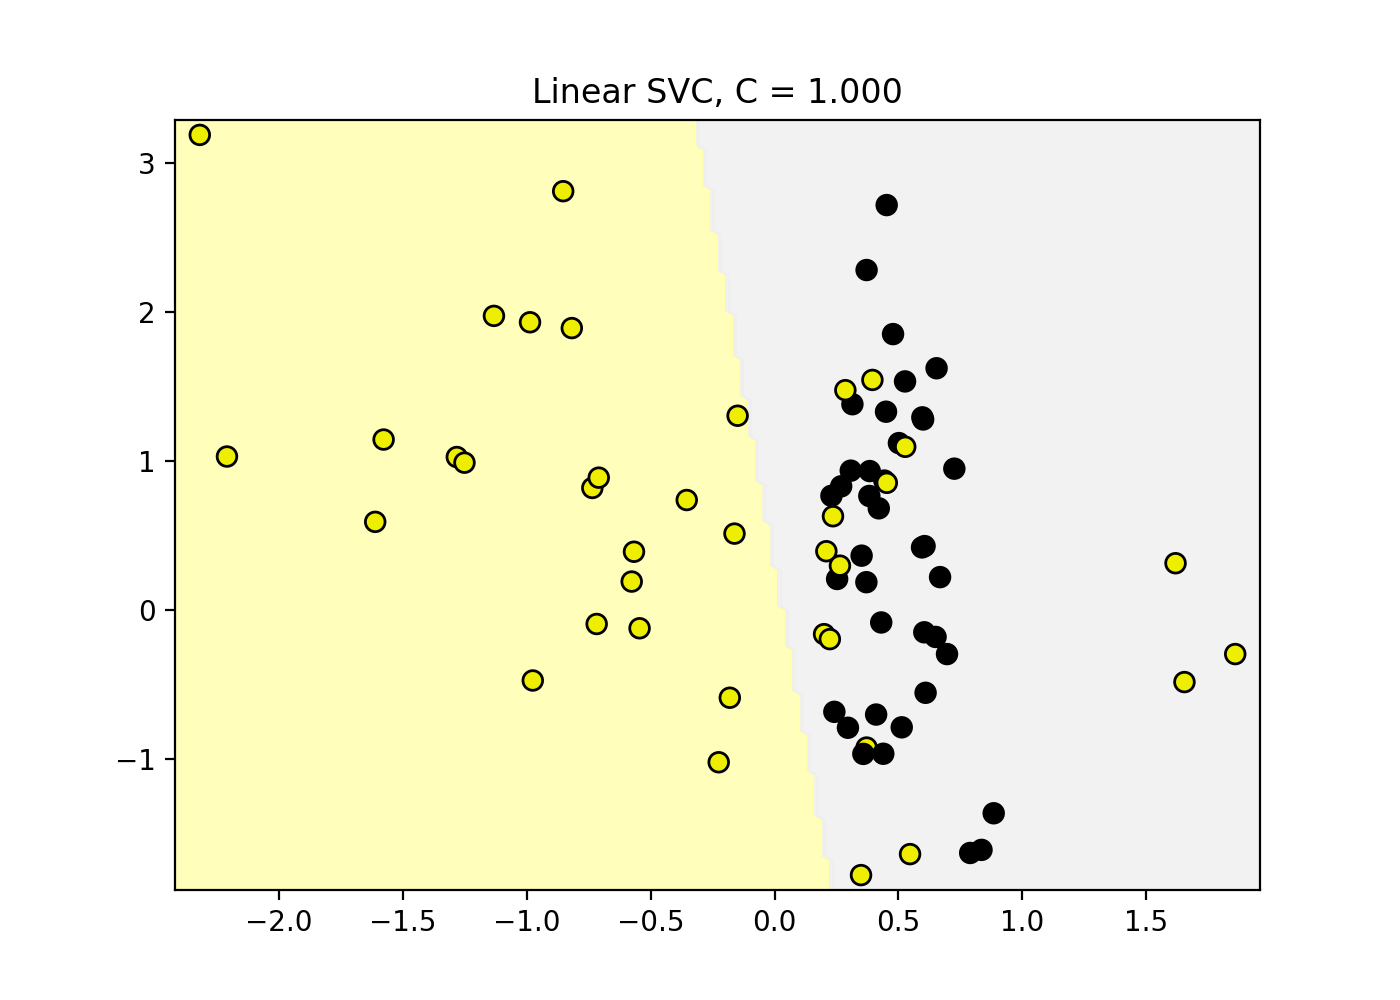

In [20]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
this_C = 1.0
clfsvm = SVC(kernel='linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
plot_class_regions_for_classifier_subplot(clfsvm, X_train, y_train, None, None, title, subaxes)

## Linear support vector machine as parameter C

<IPython.core.display.Javascript object>


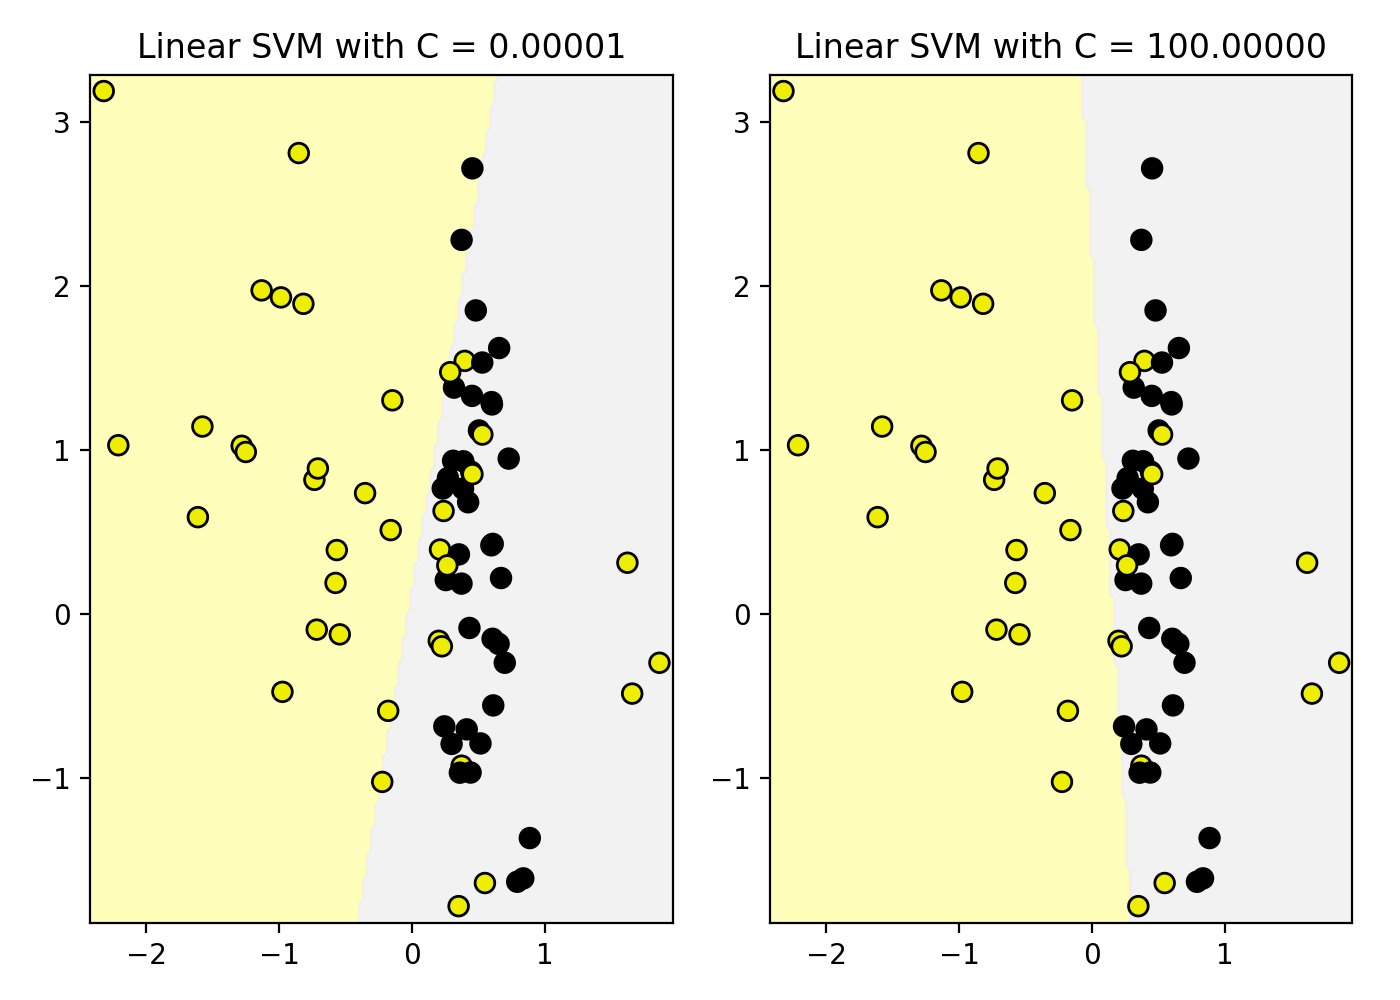

In [21]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
fig, subaxes = plt.subplots(1, 2, figsize=(7, 5))

for this_C, subplot in zip([0.00001, 100], subaxes):
    linsvm = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVM with C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(linsvm, X_train, y_train, None, None, title, subplot)

plt.tight_layout()

## Real Dataset example of svm

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

linsvm = LinearSVC().fit(X_train, y_train)
print("Breast Cancer dataset")
print("Accuracy of Linear SVM classifier on training dataset = {:.3f}".format(linsvm.score(X_train, y_train)))
print("Accuracy of Linear SVM classifier on training dataset = {:.3f}".format(linsvm.score(X_test, y_test)))

Breast Cancer dataset
Accuracy of Linear SVM classifier on training dataset = 0.930
Accuracy of Linear SVM classifier on training dataset = 0.937


## Kernelized Support Vector Machine 

### Classification 

<IPython.core.display.Javascript object>


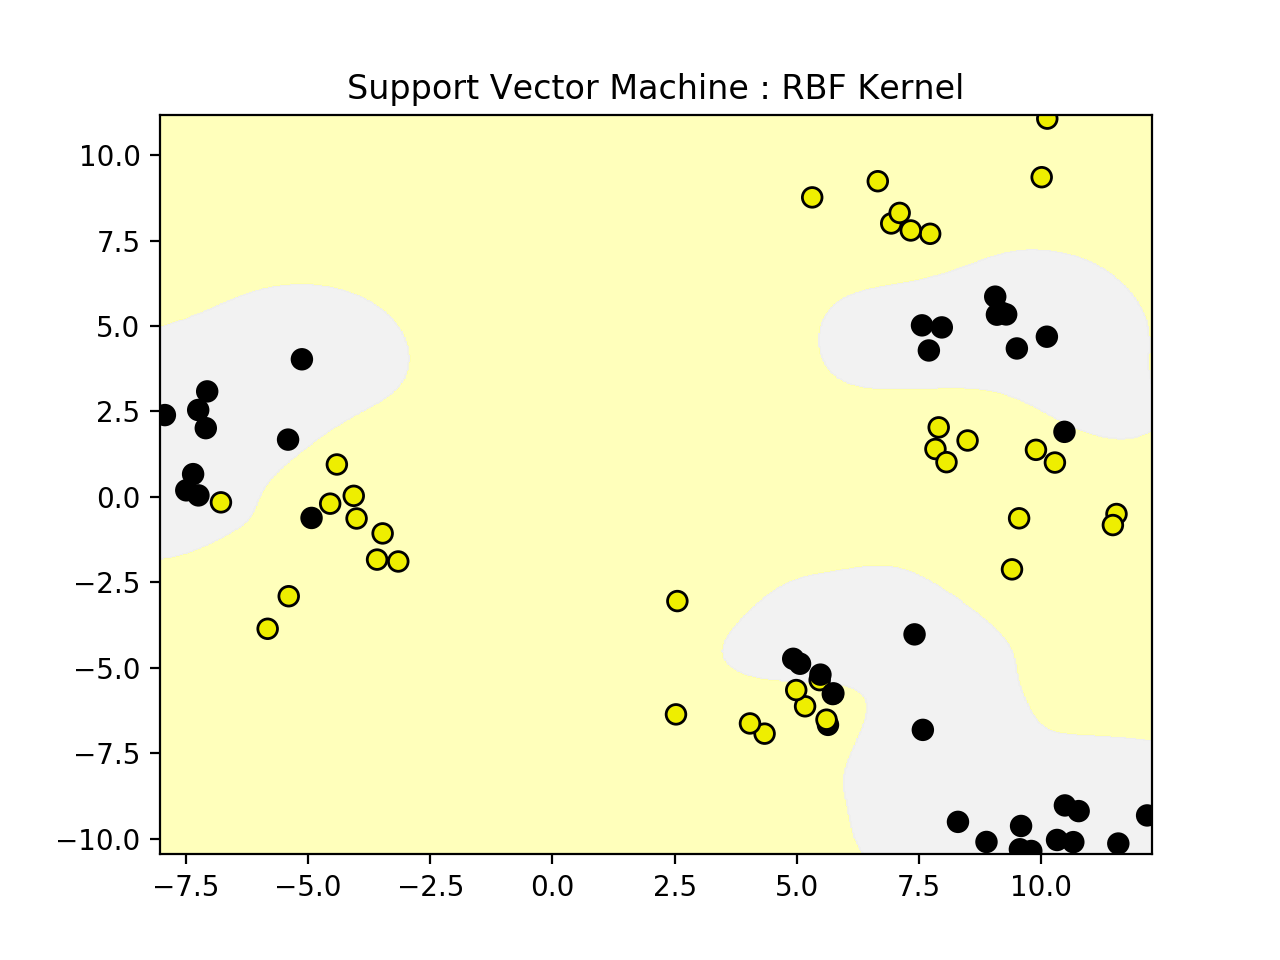

<IPython.core.display.Javascript object>


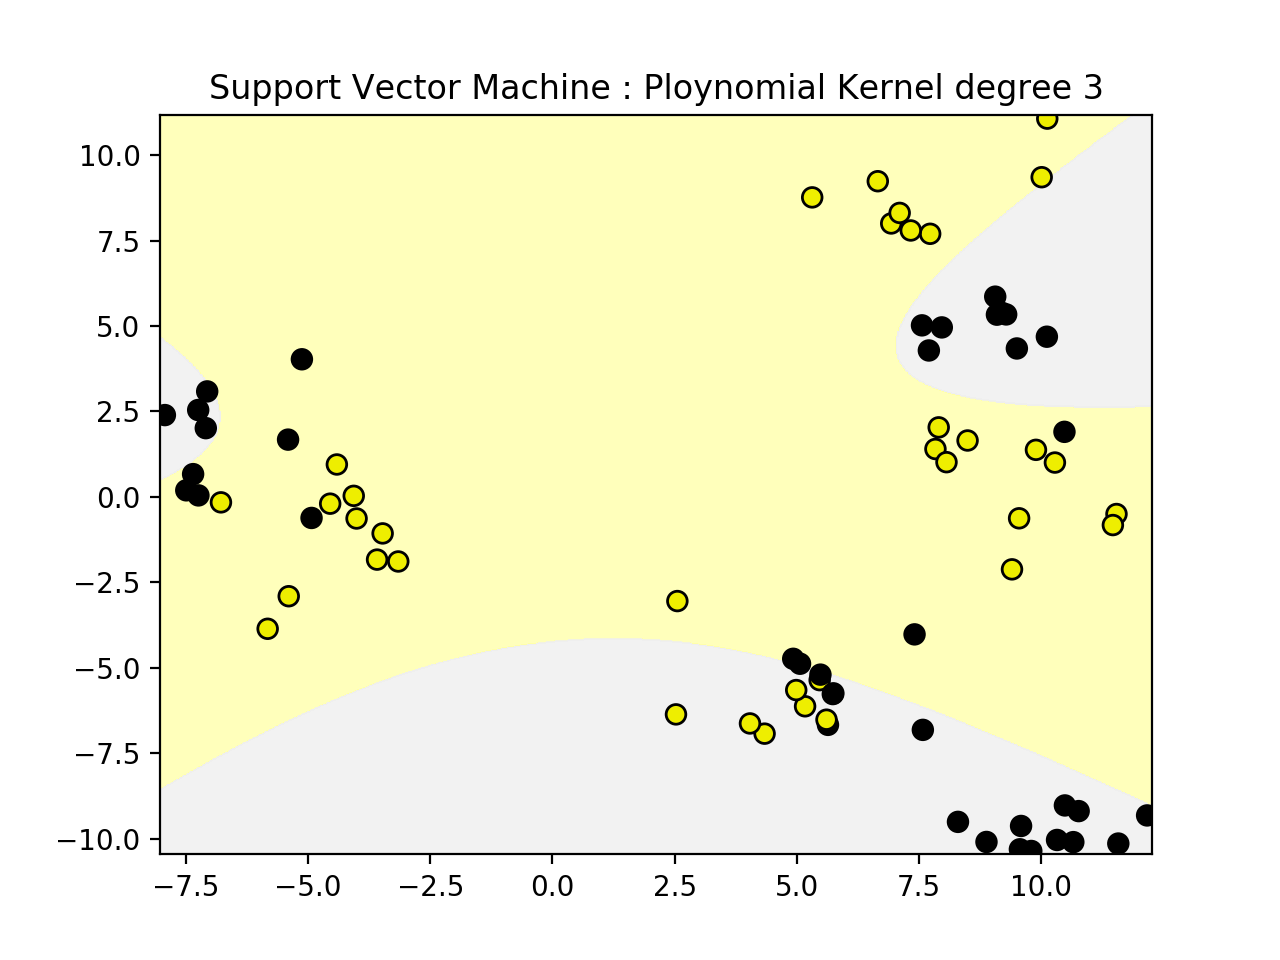

In [24]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train), X_train, y_train, None, None, 
                                  'Support Vector Machine : RBF Kernel')

# Compare Decision boundary with polynomial Kernel, degree=3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree=3).fit(X_train, y_train), X_train, y_train, None, None, 
                                 'Support Vector Machine : Ploynomial Kernel degree 3')

## Support vector machine with RBF Kernel : Gamma Parameter

<IPython.core.display.Javascript object>


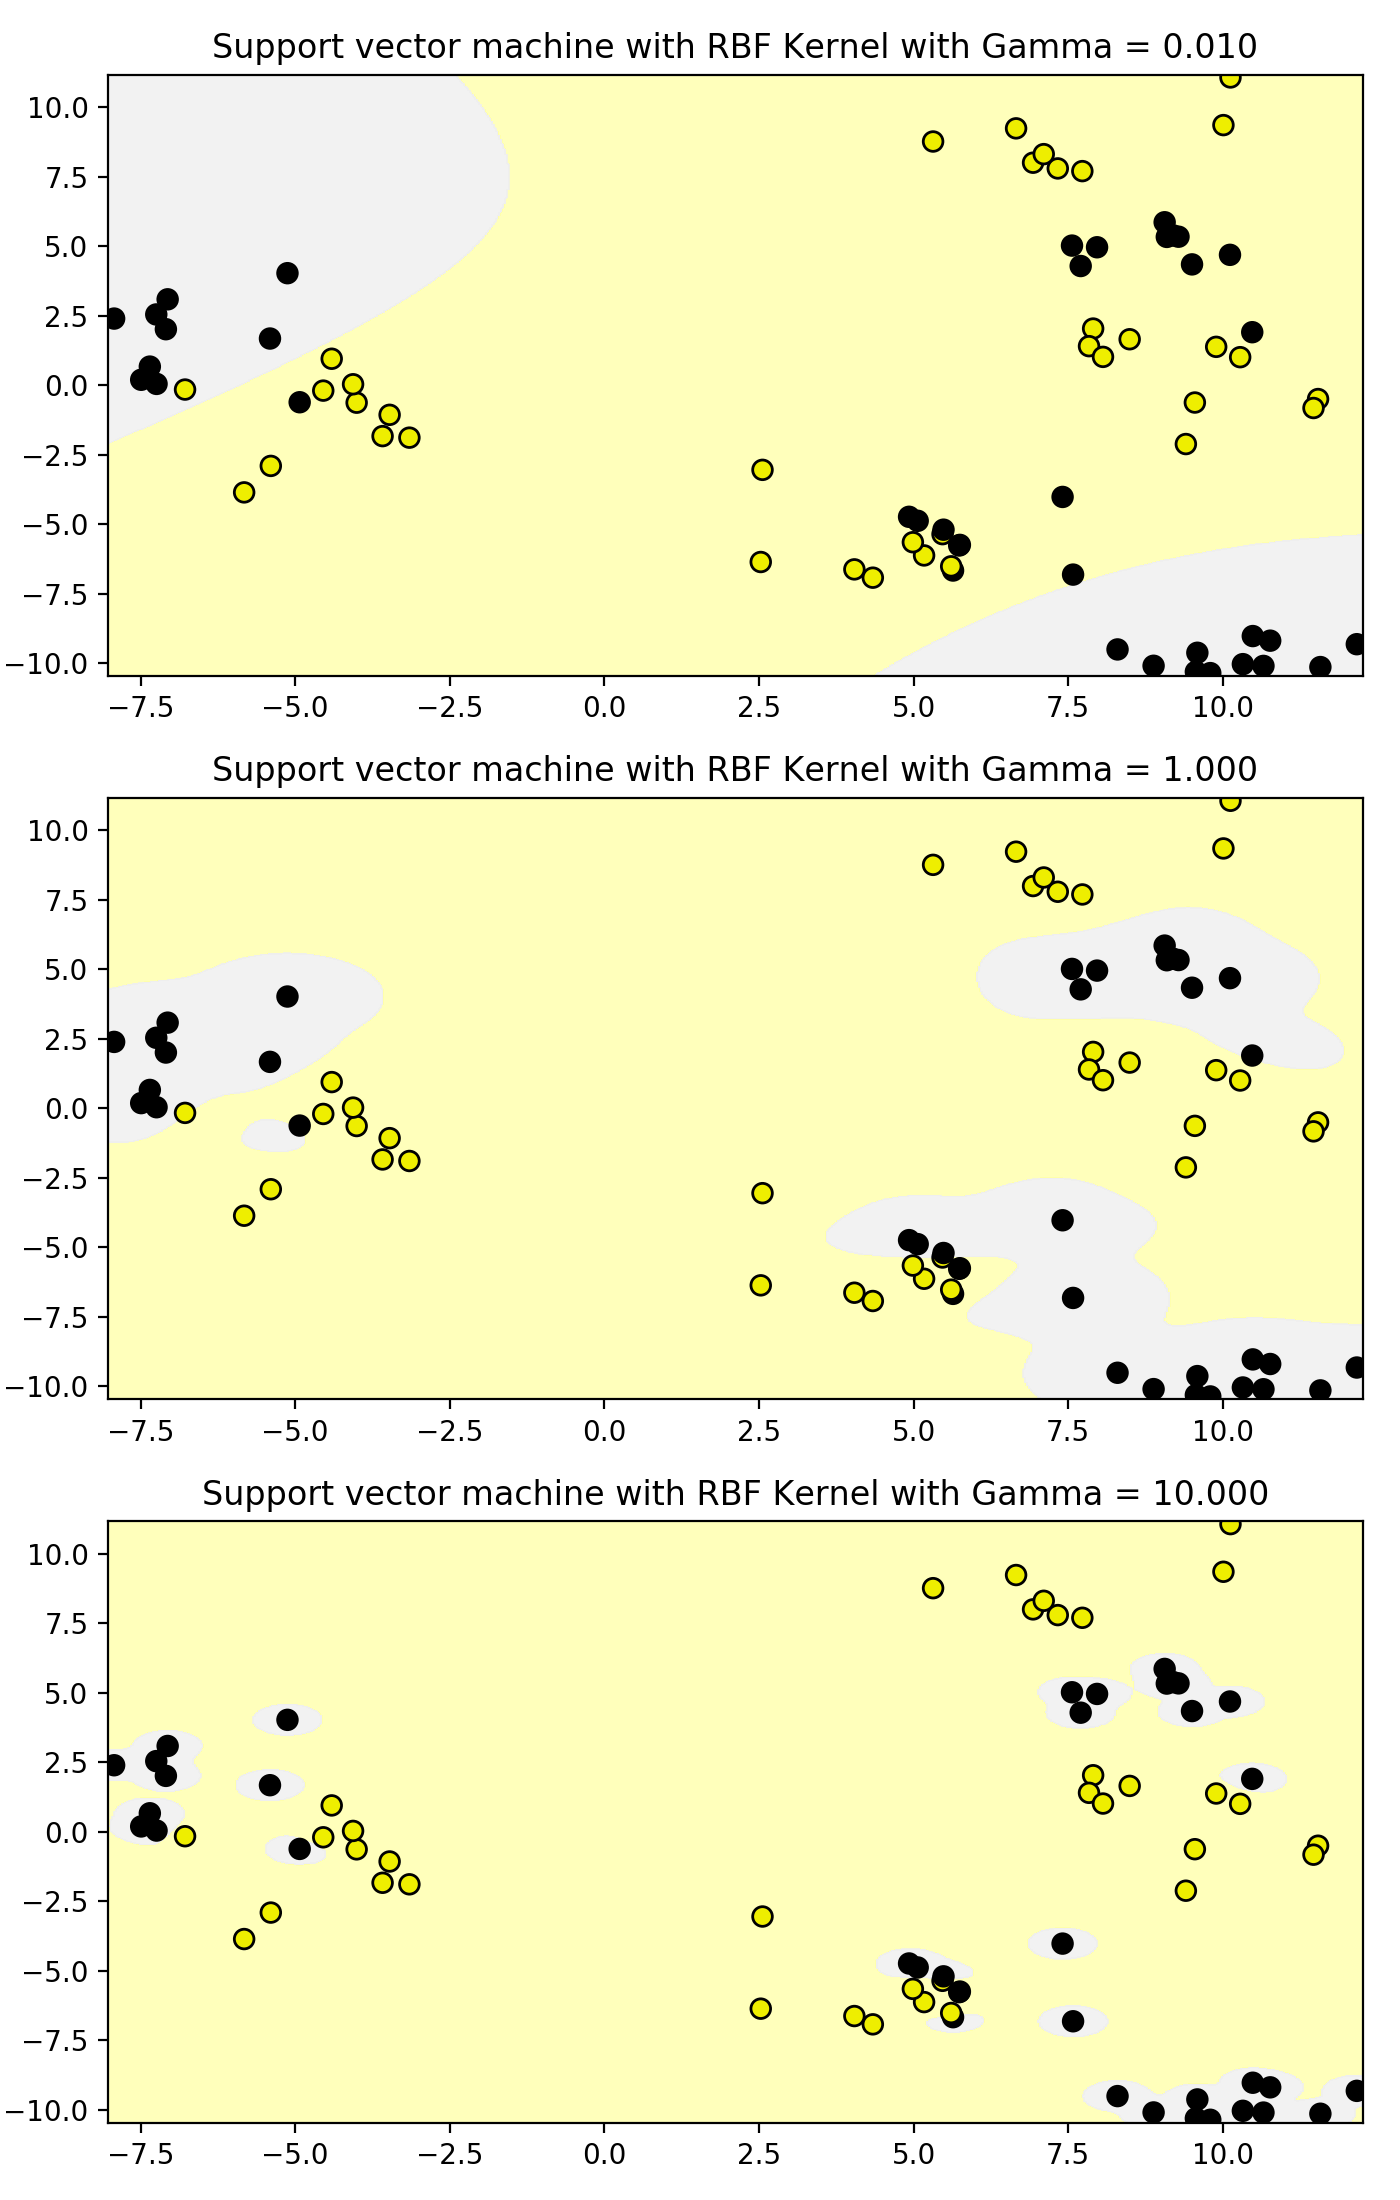

In [31]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(3, 1, figsize=(7, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10], subaxes):
    title = 'Support vector machine with RBF Kernel with Gamma = {:.3f}'.format(this_gamma)
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)

plt.tight_layout()

## Support Vector Machine with RBF kernel: using both C and gamma parameter

<IPython.core.display.Javascript object>


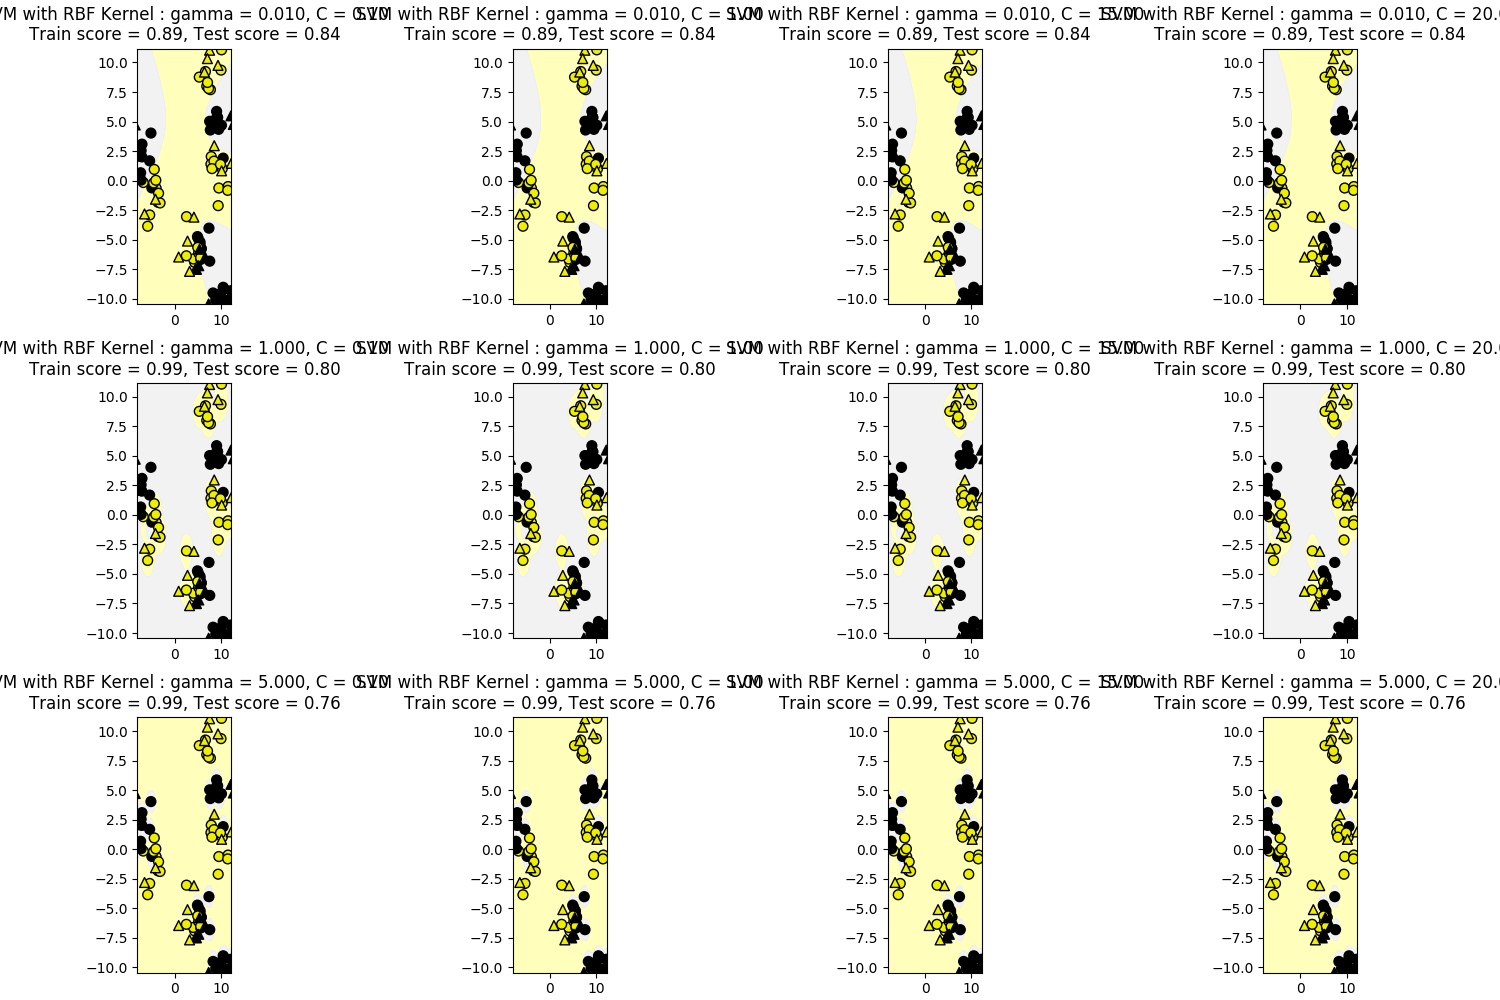

In [33]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axes in zip([0.01, 1, 5], subaxes):
    for this_c, subplot in zip([0.1, 1, 15, 20], this_axes):
        clf = SVC(kernel='rbf', gamma=this_gamma, C=this_C).fit(X_train, y_train)
        title = "SVM with RBF Kernel : gamma = {:.3f}, C = {:.2f}".format(this_gamma, this_c)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subplot)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Application of SVM with real dataset : unnormalized dataset

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = SVC(C=10).fit(X_train, y_train)
print("Breast cancer dataset")
print("SVM accuracy (training dataset): = {:.2f}".format(clf.score(X_train, y_train)))
print("SVM accuracy (test dataset) : = {:.2f}".format(clf.score(X_test, y_test)))

Breast cancer dataset
SVM accuracy (training dataset): = 1.00
SVM accuracy (test dataset) : = 0.63


### Application of SVM with real dataset : normalized dataset with feature preprocessing with MinMax sclaer

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print("Breast cancer dataset")
print("SVM accuracy (training dataset): = {:.2f}".format(clf.score(X_train_scaled, y_train)))
print("SVM accuracy (test dataset) : = {:.2f}".format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
SVM accuracy (training dataset): = 0.98
SVM accuracy (test dataset) : = 0.96


## Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=5)

X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()

csv_score = cross_val_score(clf, X, y)
print('Cross-validation scores (3-fold):', csv_score)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(csv_score)))

Cross-validation scores (3-fold): [ 0.77  0.74  0.83]
Mean cross-validation score (3-fold): 0.781


## Decision Tree

In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

treeclf = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy of decision tree classifier on training data set : {:.2f}".format(treeclf.score(X_train, y_train)))
print("Accuracy of decision tree classifier on test data set : {:.2f}".format(treeclf.score(X_test, y_test)))

Accuracy of decision tree classifier on training data set : 1.00
Accuracy of decision tree classifier on test data set : 0.97


## Max decision tree depth

In [44]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print("Accuracy of decision tree classifier on training data set : {:.2f}".format(clf2.score(X_train, y_train)))
print("Accuracy of decision tree classifier on test data set : {:.2f}".format(clf2.score(X_test, y_test)))

Accuracy of decision tree classifier on training data set : 0.98
Accuracy of decision tree classifier on test data set : 0.97


In [45]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Feature Importance

<IPython.core.display.Javascript object>


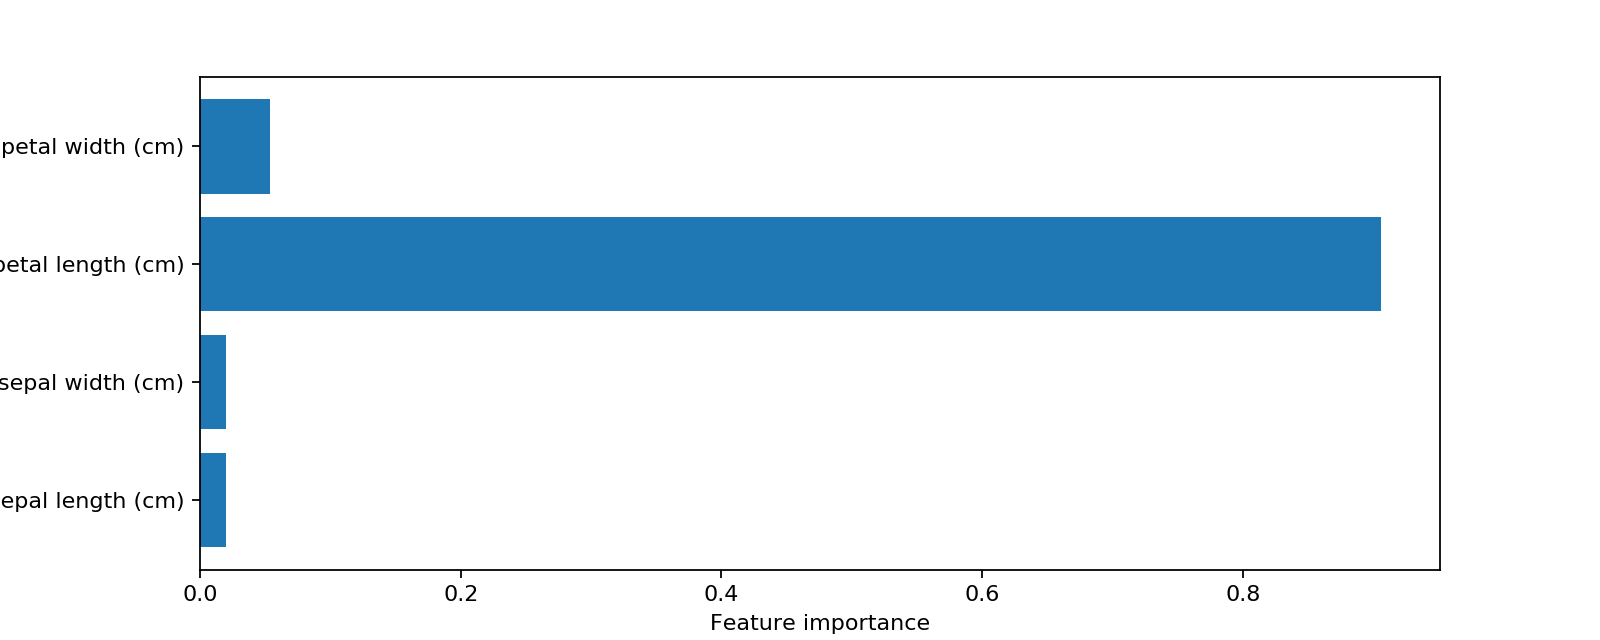

Feature importances: [ 0.02  0.02  0.91  0.05]


In [47]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(treeclf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(treeclf.feature_importances_))

## Decision tree on real world dataset

In [48]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


<IPython.core.display.Javascript object>


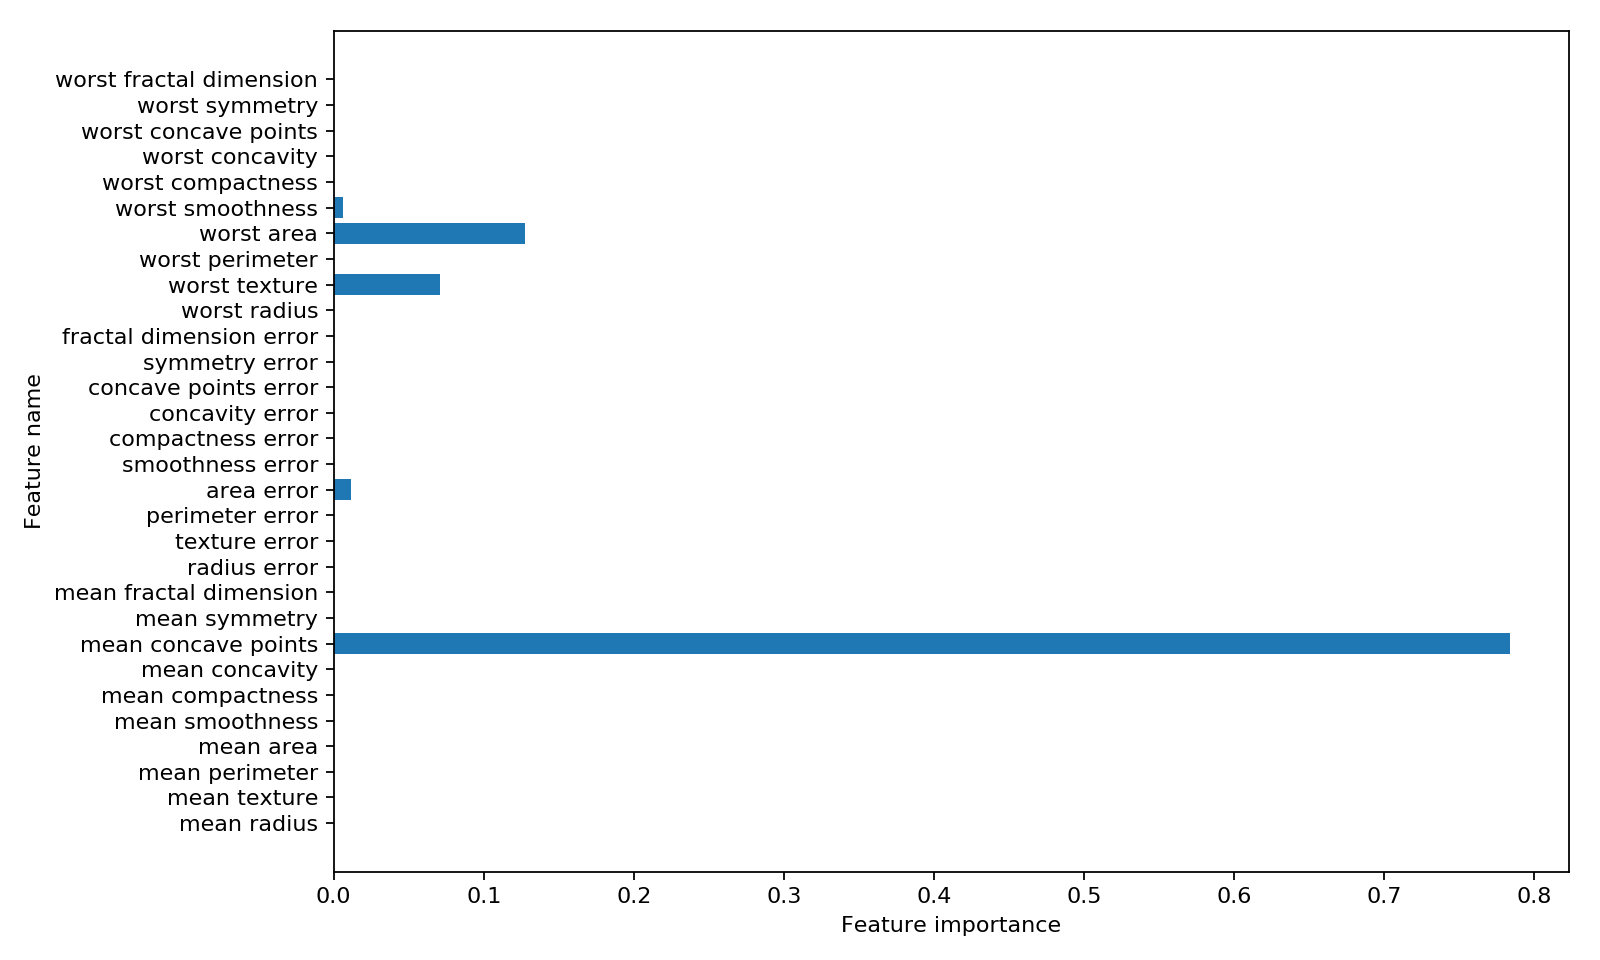

In [49]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()